## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
#Carrega arquivo de dados AB para o Dataframe
df_ab_data = pd.read_csv("ab_data.csv")
df_ab_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [7]:
#Número de linhas no conjunto de dados
num_lin = df_ab_data.shape[0]
print("Número de linhas no conjunto de dados: ", num_lin)

Número de linhas no conjunto de dados:  294478


c. The number of unique users in the dataset.

In [8]:
#Número de usuários únicos no conjunto de dados
num_uniq_user_id = df_ab_data.user_id.nunique()
print("Número de usuários únicos no conjunto de dados: ", num_uniq_user_id)

Número de usuários únicos no conjunto de dados:  290584


d. The proportion of users converted.

In [9]:
#Proporção de usuários convertidos
prop_conv = df_ab_data.query('converted == "1"').user_id.nunique() / num_uniq_user_id
print("Proporção de usuários convertidos: {0:.0%}".format(prop_conv))

Proporção de usuários convertidos: 12%


e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
#Número de vezes de new_page e treatment não estão alinhados
num_diff = df_ab_data.query('(group == "treatment" and landing_page != "new_page") or \
    (group != "treatment" and landing_page == "new_page")')['user_id'].count()
print("Número de vezes de new_page e treatment não estão alinhados: ", num_diff)

Número de vezes de new_page e treatment não estão alinhados:  3893


In [11]:
#Estão faltando valores em alguma linha?
res = df_ab_data.isnull().values.any()
if res == True:
    print("Sim, estão faltando valores em alguma linha.")
else:
    print("Não estão faltando valores em nenhuma linha.")

Não estão faltando valores em nenhuma linha.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
#Remover linhas que new_page e treatment não estão alinhados
df2 = df_ab_data.drop(df_ab_data.query('(group == "treatment" and landing_page != "new_page") or \
    (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or \
    (group != "control" and landing_page == "old_page")').index)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
#Número de usuários únicos no conjunto de dados df2
num_uniq_user_id = df2.user_id.nunique()
print("Número de usuários únicos no conjunto de dados: ", num_uniq_user_id)

Número de usuários únicos no conjunto de dados:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#Idenfificando user_id com duplicidade
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#Removendo a segunda linha em duplicida e mantendo a que teve o primeiro acesso. 
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)

In [18]:
#Validando se a linha foi eliminada
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
#Probabilidade de conversão, independentemente da página.
prob_conv = (df2.query('converted == 1')['user_id'].nunique())/(df2.shape[0])
#p2 = converted_users2/(df2.shape[0])
print("Probabilidade de conversão, independentemente da página {0:.4}".format(prob_conv))

Probabilidade de conversão, independentemente da página 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
#Já que um indivíduo recebeu a página control, a probabilidade de conversão.
conv_control = (df2.query('converted == 1 and group == "control"')['user_id'].nunique()) 
prop_conv_control = conv_control / df2.query('group == "control"')['user_id'].nunique()
print("Probabilidade de conversão para o grupo control: {0:.4}".format(prop_conv_control))


Probabilidade de conversão para o grupo control: 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
#Já que um indivíduo recebeu a página control, a probabilidade de conversão.
conv_treatment = df2.query('converted == 1 and group == "treatment"')['user_id'].nunique() 
prop_conv_treatment = conv_treatment / df2.query('group == "treatment"')['user_id'].nunique()
print("Probabilidade de conversão para o grupo treatment: {0:.4}".format(prop_conv_treatment))


Probabilidade de conversão para o grupo treatment: 0.1188


d. What is the probability that an individual received the new page?

In [22]:
#A probabilidade de receber a new page.
new_pag = df2.query('landing_page == "new_page"')['user_id'].nunique()
prop_new_pag = new_pag/df2.shape[0]
print("A probabilidade de receber a new page é {0:.4}".format(prop_new_pag))


A probabilidade de receber a new page é 0.5001


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- Probabilidade de conversão, independentemente da página 0.1196
- Probabilidade de conversão para o grupo control: 0.1204
- Probabilidade de conversão para o grupo treatment: 0.1188
- A probabilidade de receber a new page é 0.5001. Baseado nesta informação, a probalidade de receber a página nova e quase a mesma de receber a página antiga. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
#p_new sob o nulo.
p_new = round((df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique()),4)

In [24]:
print("P_new: ", p_new)

P_new:  0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
#p_old sob o nulo.
p_old = round((df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique()),4)

In [26]:
print("P_old: ", p_old)

P_old:  0.1196


c. What is $n_{new}$?

In [27]:
#n_new
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

In [28]:
print("N_new: ", n_new)

N_new:  145310


d. What is $n_{old}$?

In [29]:
#n_new
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 

In [30]:
print("N_old: ", n_old)

N_old:  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# Simular n_new transações com uma taxa de conversão de p_new 
new_pag_conv = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
print("Simulação de taxa de conversão para nova página: ", new_pag_conv)

Simulação de taxa de conversão para nova página:  [0 1 1 ... 1 0 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# Simular n_old transações com uma taxa de conversão de p_old
old_pag_conv = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
print("Simulação de taxa de conversão para página antiga: ", old_pag_conv)

Simulação de taxa de conversão para página antiga:  [1 1 1 ... 0 1 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
diff = new_pag_conv.mean() - old_pag_conv.mean()
print("Simulação da diferença: ", diff)

Simulação da diferença:  -0.0009886476736865601


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []
size = df_ab_data.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_pag_conv = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_pag_conv = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_pag_conv.mean() - old_pag_conv.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

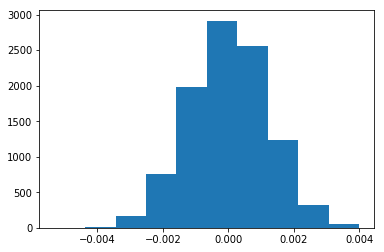

In [35]:
#Converte para numpy array
p_diffs = np.array(p_diffs)

#Plotar a distribuição da amostra
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
#Contar paginas convertidas new_page e old_page
conv_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
conv_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

#Calcular taxa de conversão observada
obs_new = (conv_new / n_new) 
obs_old = (conv_old / n_old)

# Calcular a diferença taxa de conversão observada
obs_diff = obs_new - obs_old
print("Diferença observada: ", obs_diff)

Diferença observada:  -0.0015782389853555567


In [37]:
#Criar distribuição sob a hipótese nula
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

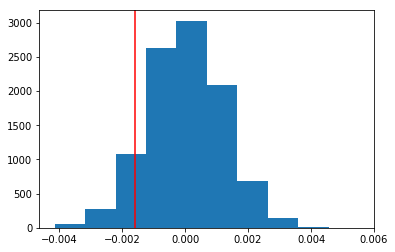

In [38]:
#Plotar distribuição nula e onde nossa estatística observada cai
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- Taxa de erro tipo I de 5%(Alfa), não foi possivel rejeitar o nulo.
- Com uma taxa de erro de tipo I de 0,05, a página antiga tem maior probablity de taxa de conversão do que a nova página.
- P-Value: A probabilidade de observar nossa estatística ou uma estatística mais extrema da hipótese nula.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

#convert_old = 
#convert_new = 
#n_old = 
#n_new = 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest(np.array([conv_new,conv_old]),np.array([n_new,n_old]), alternative = 'larger')
print("zcore: ", z_score, "\np_value: " , p_value)

zcore:  -1.3109241984234394 
p_value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Este resultado condiz com os encontratos em j e k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
#Criar coluna intercept
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [42]:
#Criar coluna dummy para cada page
df2 = df2.join(pd.get_dummies(df2['landing_page']))

#Criar coluna dummy para treatment
df2['ab_page'] = pd.get_dummies(df_ab_data['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
#Criar modelo Logistic Regression
lr = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
print(result.summary())
#result.summary()

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:56:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- O p_value é 0.190 está associado a coluna ab_page, sendo menor que o valor calculado usando a função z-score.
  O que sugere que essa nova página não é estatisticamente significativa.


- Existe diferença nas Hipóteses alternativas entre o tratamento e o grupo de controle:
    H0 : p_new - p_old = 0    
    H1 : p_new - p_old != 0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


- A vantagem de se adicionar outros fatores ao modelo de regresão,é que eles podem influenciar as conversões também. 
Usuários podem criar aversão à mudança ou até mesmo, o oposto, como uma predisposição à conversão. Sazonalidade como novos termos ou novos anos pode significar mais interesse em novas habilidades / resoluções.


- Fatores como dispositivo em que foram realizados testes ou curso que foi examinado, antecedentes acadêmicos, idade, podem alterar a experiência e, em última instância, as conversões. Estas são limitações que devem ser, pelo menos, mantidas em mente ao tomar a decisão final.
Poderíamos considerar a introdução de registro de data e hora para determinar em qual parte do dia os indivíduos se converteram mais. Seria possível identificar em qual período os usuários mais utilizam a internet, podemos levar isso em também consideração para validar a analise.


- A desvantagem de adicionar termos adicionais ao modelo de regressão é que, mesmo com fatores adicionais, nunca podemos contabilizar todos os fatores que influenciam ou acomodá-los. Além disso, pequenos pilotos às vezes funcionam melhor na prática do que pesquisas demoradas.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [68]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [78]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [77]:
#Create Logit regression model for conveted and country, and us CA and old page as baseline
lr2 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']])
### Fit Your Linear Model And Obtain the Results
result2 = lr2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 29 Sep 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:25:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.

### Regression Model Conclusion
- Neste modelo de regressão logística, constatamos que os valores não mostram uma diferença substancial nas taxas de conversão para o grupo controle e grupo de tratamento.
- Com isso, podemos aceitar a Hipótese Nula e manter a pagina que já existe. Uma vez que o ganho seria inexpressivo.


<a id='conclusions'></a>
## Conclusions

- O desempenho da página antiga é bom, conforme calculado por diferentes técnicas.
- Com isso, rejeitamos a Hipótese Alternativa e aceitamos a Hipótese Nula.




Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

### Recursos

#### Sintaxe para validação de valores nulos
https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
#### Duplicated values 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html
#### Two-sample Proportion Hypothesis Testing with Statsmodels
http://knowledgetack.com/python/statsmodels/proportions_ztest/
#### pandas.get_dummies
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
#### Statistics How To (sugestão do revisor)
https://www.statisticshowto.datasciencecentral.com/how-to-decide-if-a-hypothesis-test-is-a-left-tailed-test-or-a-right-tailed-test/
#### Como selecionar atributos para resolver a maldição da dimensionalidade (sugestão do revisor)
https://medium.com/@fabiolenine/como-selecionar-atributos-para-resolver-a-maldi%C3%A7%C3%A3o-da-dimensionalidade-5c810bc8449f